In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Introduction



Marketing has a critical role when it comes to feed the company with customers that are aligned with the product or service that such company is offering. In order to do that properly it is important to understand target audience 
Customer Segmentation or Customer Personality Analysis is about creating different groups or segment of customers based on their behaviors. This segmentation aims to help businesses to understand their customers allowing them to:

- Identify pain points and concerns in customers
- Modify products and behaviors to specific needs
- Improve marketing campaigns and targeting

Understanding customers and which segment describes them the best can help a business develop effective and efficient marketing strategies. In a dataset with few features in most cases Exploratory analysis for customer behaviour is often enough, but in a dataset that contains multiple customer attributes it becomes exponentially more difficult.  K-Means Clustering algorithm which is an unsupervised learning is ideally suited for that. k-Means Clustering is frequently used algorithm for drawing insights into the formations and separations within data. 

#### Our Goal
Goal here is to segment a dataset of E-commerce customers using k-Means Clustering Algorithm to create optimal number of Customer Segments and to classify the different customers from Online Retail.xlsx in different segments with the goal of improving marketing campaigns in the future.

In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [4]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],format="%d-%m-%Y")

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#Data Cleanup

In [10]:
df.loc[df['Quantity']<=0].shape

(10624, 8)

In [11]:
df = df.loc[df['Quantity']>0]

In [12]:
df.shape

(531285, 8)

In [13]:
#Missing Customer

In [14]:
pd.isnull(df['CustomerID']).sum()

133361

In [15]:
df = df.loc[~pd.isnull(df['CustomerID'])]

In [16]:
df.shape

(397924, 8)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
#Calculate Total Sales 

In [19]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Customer Purchases 

In [21]:
df = df.loc[df['Sales']>0]

In [22]:
df.shape

(397884, 9)

In [23]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum, 
    'InvoiceNo': lambda x: x.nunique()
})

In [24]:
customer_df.columns = ['TotalSales', 'OrdersCount']

In [25]:
customer_df.head(5)

,TotalSales,OrdersCount
CustomerID,,
12346.0,77183.60,1
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [26]:
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrdersCount']

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [28]:
customer_df.head()

,TotalSales,OrdersCount,AvgOrderValue
CustomerID,,,
12346.00,77183.60,1,77183.60
12347.00,4310.00,7,615.71
12348.00,1797.24,4,449.31
12349.00,1757.55,1,1757.55
12350.00,334.40,1,334.40


In [29]:
customer_df.describe()

,TotalSales,OrdersCount,AvgOrderValue
count,4338.00,4338.00,4338.00
mean,2054.27,4.27,419.17
std,8989.23,7.70,1796.54
min,3.75,1.00,3.45
25%,307.41,1.00,178.62
50%,674.49,2.00,293.90
75%,1661.74,5.00,430.11
max,280206.02,209.00,84236.25


In [30]:
rank_df = customer_df.rank(method='first')

In [31]:
rank_df.shape

(4338, 3)

In [32]:
#Scaling
scaler = StandardScaler()
scaler.fit(rank_df)
scaled_ds = pd.DataFrame(scaler.transform(rank_df),columns= rank_df.columns )
print("All features are now scaled")

All features are now scaled


In [33]:
scaled_ds.head()

,TotalSales,OrdersCount,AvgOrderValue
0,1.72,-1.73,1.73
1,1.46,1.17,1.32
2,0.93,0.53,0.94
3,0.91,-1.73,1.68
4,-0.75,-1.73,0.34


In [34]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,TotalSales,OrdersCount,AvgOrderValue
0,1.72,-1.73,1.73
1,1.46,1.17,1.32
2,0.93,0.53,0.94
3,0.91,-1.73,1.68
4,-0.75,-1.73,0.34


In [35]:
#Initiating PCA to reduce dimentions aka features to 3

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,4338.00,0.00,1.44,-2.88,-1.16,-0.02,1.18,2.96
col2,4338.00,0.00,0.94,-2.41,-0.63,0.06,0.69,2.43
col3,4338.00,0.00,0.19,-1.07,-0.12,-0.01,0.11,1.40


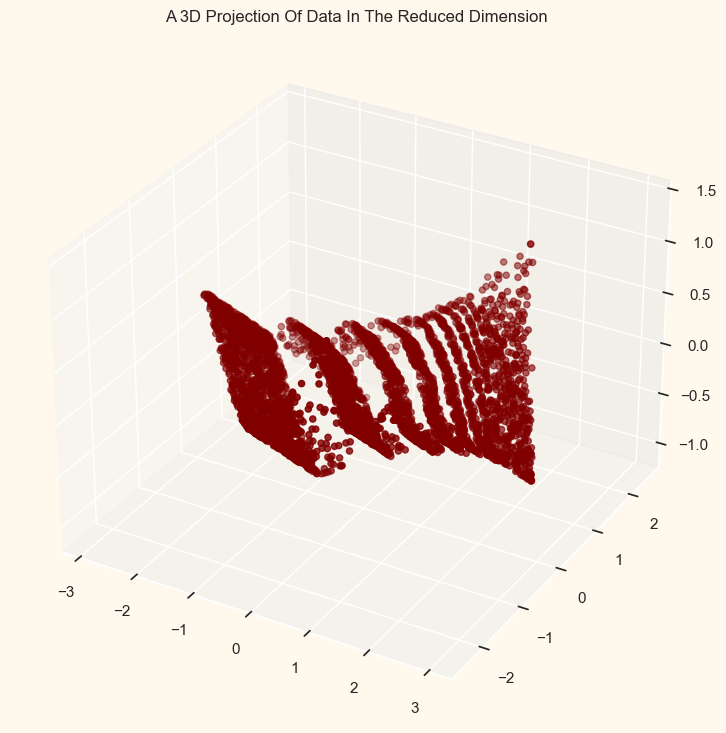

In [64]:
#A 3D Projection Of Data In The Reduced Dimension

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


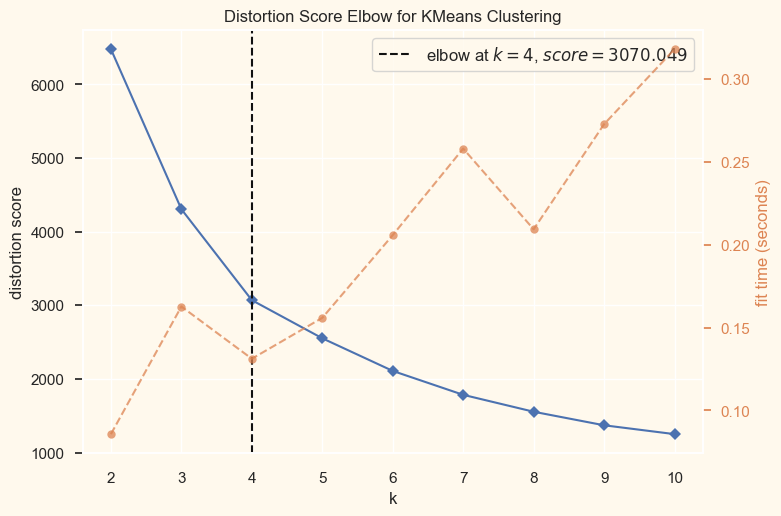

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [38]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
rank_df["Clusters"]= yhat_AC


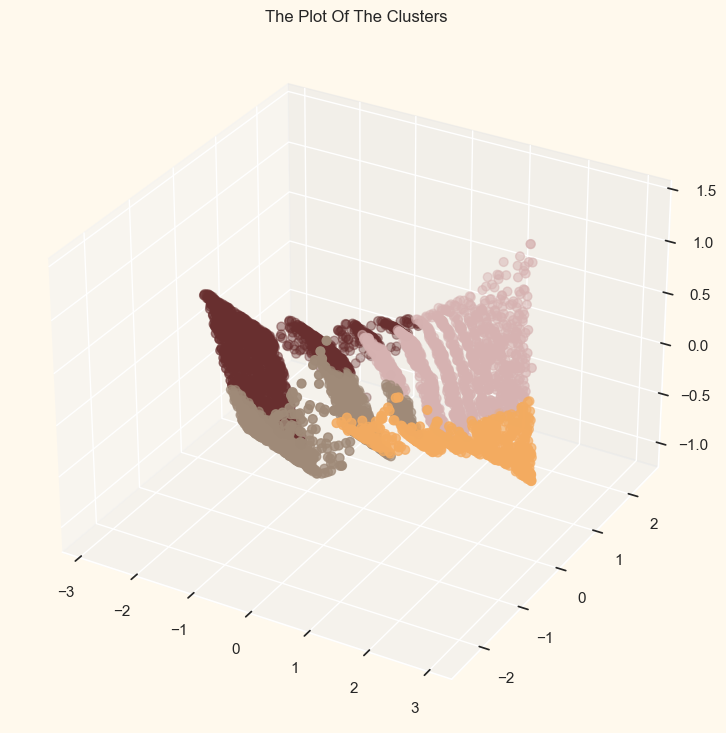

In [63]:
#Plotting the clusters
fig = plt.figure(figsize=(9,9))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()


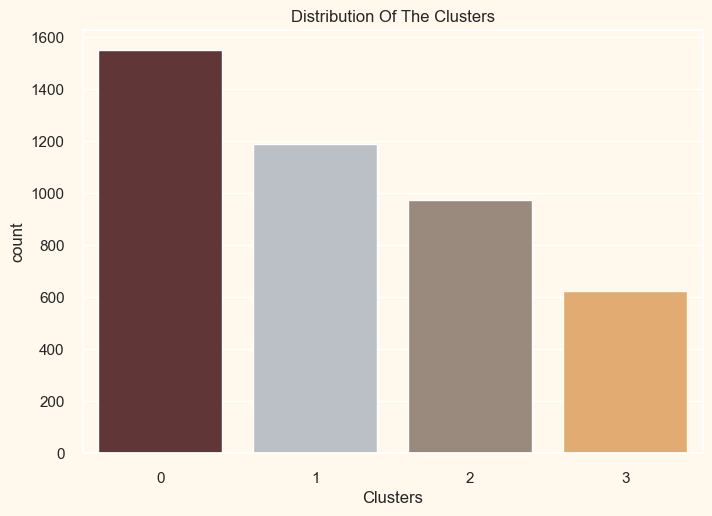

In [53]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=rank_df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

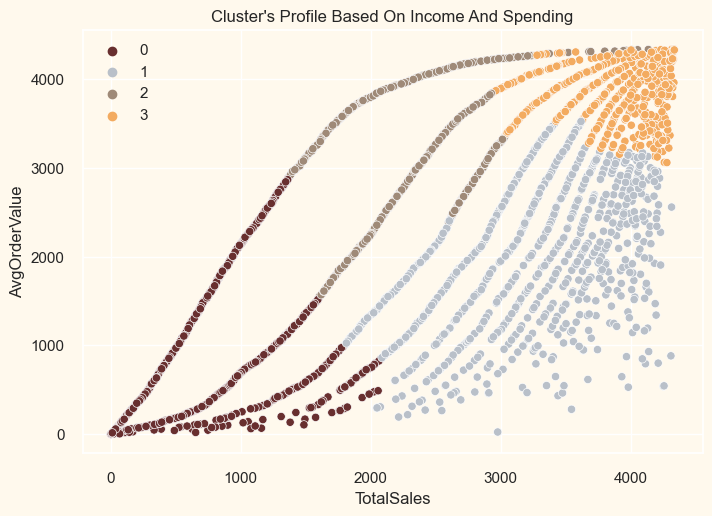

In [41]:
pl = sns.scatterplot(data = rank_df,x=rank_df["TotalSales"], y=rank_df["AvgOrderValue"],hue=rank_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

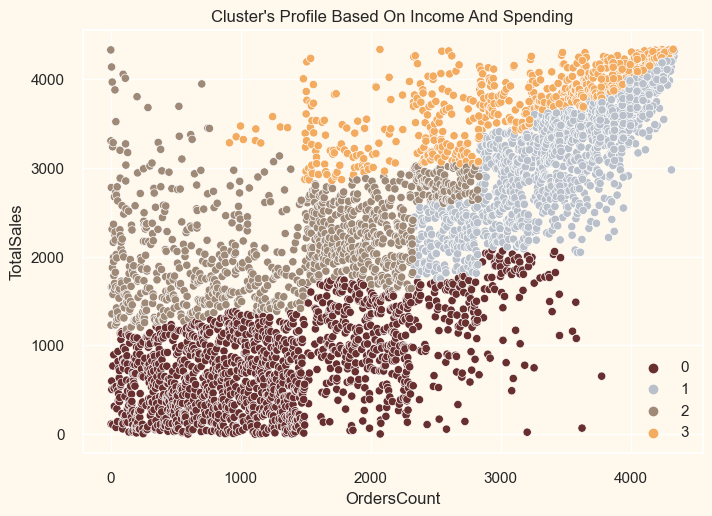

In [42]:
pl = sns.scatterplot(data = rank_df,x=rank_df["OrdersCount"], y=rank_df["TotalSales"],hue=rank_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

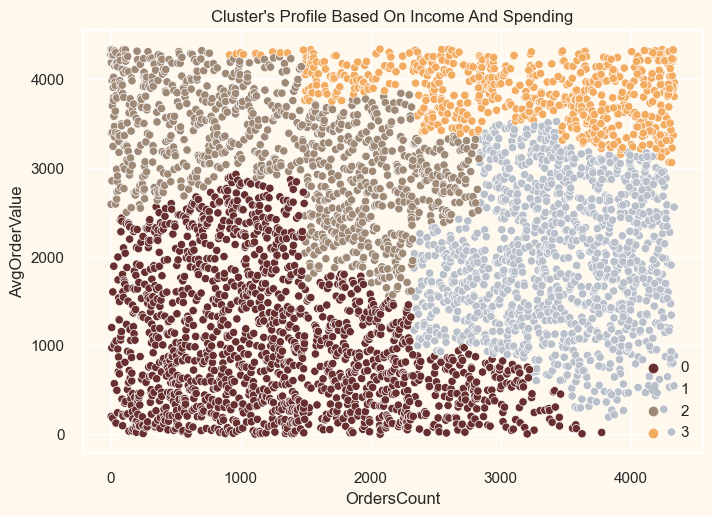

In [43]:
pl = sns.scatterplot(data = rank_df,x=rank_df["OrdersCount"], y=rank_df["AvgOrderValue"],hue=rank_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

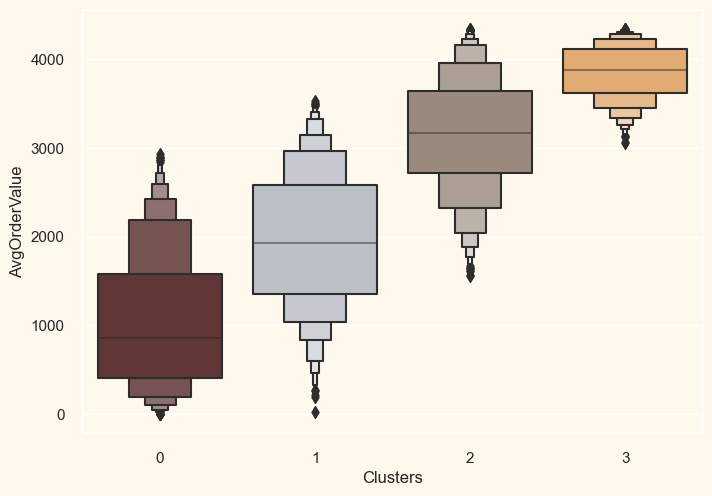

In [44]:
plt.figure()
pl=sns.boxenplot(x=rank_df["Clusters"], y=rank_df["AvgOrderValue"], palette=pal)
plt.show()

In [45]:
rank_df

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12346.00,4329.00,1.00,4337.00,2
12347.00,4003.00,3639.00,3822.00,3
12348.00,3333.00,2837.00,3345.00,1
12349.00,3305.00,2.00,4275.00,2
12350.00,1229.00,3.00,2590.00,2
...,...,...,...,...
18280.00,563.00,1492.00,1106.00,0
18281.00,104.00,1493.00,169.00,0
18282.00,546.00,2328.00,201.00,0


In [46]:
High_value_customer = rank_df.loc[rank_df['Clusters'] == 3]
High_value_customer.head()

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12347.00,4003.00,3639.00,3822.00,3
12356.00,3738.00,2329.00,4121.00,3
12358.00,2871.00,1494.00,3763.00,3
12359.00,4144.00,2838.00,4261.00,3
12360.00,3695.00,2330.00,4092.00,3


In [47]:
customer_df.loc[High_value_customer.index].describe()

,TotalSales,OrdersCount,AvgOrderValue
count,625.00,625.00,625.00
mean,8577.97,8.89,1031.61
std,22149.14,13.23,3476.98
min,1156.36,1.00,395.74
25%,2163.98,3.00,520.90
50%,3512.53,5.00,648.27
75%,6688.46,9.00,921.25
max,280206.02,201.00,84236.25


In [48]:
result_df = pd.merge(customer_df,rank_df[['Clusters']],on='CustomerID')

In [49]:
result_df

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12346.00,77183.60,1,77183.60,2
12347.00,4310.00,7,615.71,3
12348.00,1797.24,4,449.31,1
12349.00,1757.55,1,1757.55,2
12350.00,334.40,1,334.40,2
...,...,...,...,...
18280.00,180.60,1,180.60,0
18281.00,80.82,1,80.82,0
18282.00,178.05,2,89.03,0


In [50]:
result_df.groupby('Clusters')[['TotalSales', 'OrdersCount', 'AvgOrderValue']].mean()

,TotalSales,OrdersCount,AvgOrderValue
Clusters,,,
0,242.85,1.54,173.71
1,1988.12,7.57,271.01
2,829.71,1.63,597.55
3,8577.97,8.89,1031.61


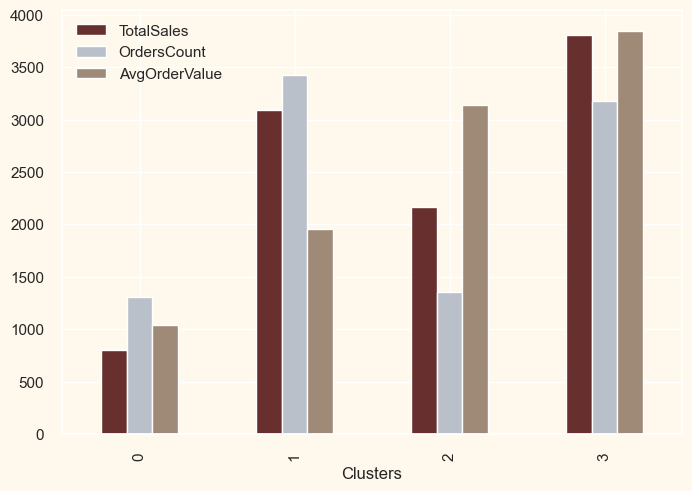

In [51]:
rank_df.groupby('Clusters')[['TotalSales', 'OrdersCount', 'AvgOrderValue']].mean().plot.bar(color=["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
plt.show()

In [71]:
pd.DataFrame(df.loc[
        df['CustomerID'].isin(High_value_customer.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head(10))

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,791
JUMBO BAG RED RETROSPOT,708
WHITE HANGING HEART T-LIGHT HOLDER,594
LUNCH BAG RED RETROSPOT,559
PARTY BUNTING,511
POSTAGE,478
ASSORTED COLOUR BIRD ORNAMENT,460
PACK OF 72 RETROSPOT CAKE CASES,438
SET OF 3 CAKE TINS PANTRY DESIGN,413


In [72]:
mid_value_customer = rank_df.loc[rank_df['Clusters'] == 2]
mid_value_customer.head()

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12346.00,4329.00,1.00,4337.00,2
12349.00,3305.00,2.00,4275.00,2
12350.00,1229.00,3.00,2590.00,2
12354.00,2779.00,5.00,4186.00,2
12355.00,1659.00,6.00,3393.00,2


In [73]:
pd.DataFrame(df.loc[
        df['CustomerID'].isin(mid_value_customer.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head(10))

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,203
ASSORTED COLOUR BIRD ORNAMENT,188
WHITE HANGING HEART T-LIGHT HOLDER,166
SET OF 3 CAKE TINS PANTRY DESIGN,159
BAKING SET 9 PIECE RETROSPOT,147
POSTAGE,143
PARTY BUNTING,143
JAM MAKING SET WITH JARS,143
PAPER CHAIN KIT 50'S CHRISTMAS,139
